In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [3]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


### 의사 대상 분석
0. 변수 구조 확인 (.columns)

In [4]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

1. 목표변수 설정 (y축) 
    - ⇒ '수술시간' 선택
2. 설명변수 설정 (x축)
    - '수술기법', '스테로이드치료', 'Location of herniation', '수술실패여부', 'Seg Angle(raw)'
    - ⇒ 설명변수 추출_(열 단위 추출 진행 (이때 목표변수 '수술시간' 같이 넣고 추출))

### 1. 수술기법과 수술시간

In [5]:
# 수술기법과 수술시간
df_ROS_tech= df_ROS[['수술시간', '수술기법']]
df_ROS_tech

,수술시간,수술기법
0,68.0,TELD
1,31.0,TELD
2,78.0,TELD
3,73.0,TELD
4,29.0,TELD
...,...,...
1889,80.0,NaN
1890,20.0,NaN
1891,50.0,IELD
1892,25.0,NaN


<Axes: xlabel='수술기법', ylabel='count'>

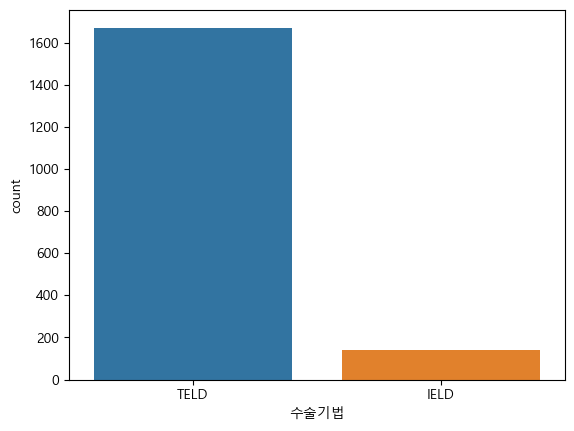

In [32]:
sns.countplot(df_ROS_tech, x='수술기법' ,)

- 수술기법별 수술시간의 mean, median, max 시간

In [6]:
df_ROS_tech.pivot_table(index=['수술기법'], values='수술시간', aggfunc=[np.mean, np.median, np.max, np.std])

,mean,median,amax,std
,수술시간,수술시간,수술시간,수술시간
수술기법,,,,
IELD,71.330882,70.0,220.0,28.960012
TELD,61.499076,60.0,190.0,24.573975


In [7]:
condition = (df_ROS_tech['수술시간'] >= 70)
df_ROS_techwithcond= df_ROS_tech.loc[condition]

In [8]:
df_ROS_techwithcond.pivot_table(index=['수술기법'], values='수술시간', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,수술시간,수술시간,수술시간
수술기법,,,
IELD,92.405797,85.0,24.204593
TELD,88.589698,85.0,16.730341


### 2. 스테로이드치료 여부에 따른 수술시간

In [9]:
df_ROS.pivot_table(index=['스테로이드치료'], values='수술시간', aggfunc=[np.mean, np.median, np.max])

,mean,median,amax
,수술시간,수술시간,수술시간
스테로이드치료,,,
0,61.987637,60.0,220.0
1,62.117806,60.0,155.0


In [10]:
condition = (df_ROS['수술시간'] >= 60)
df_ROS_steroid= df_ROS.loc[condition]

In [11]:
df_ROS_steroid.pivot_table(index=['스테로이드치료'], values='수술시간', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,수술시간,수술시간,수술시간
스테로이드치료,,,
0,82.598361,78.5,20.512339
1,79.399668,75.0,17.764362


### 3. Location of herniation 수치에 따른 수술 시간

In [12]:
df_ROS.pivot_table(index=['Location of herniation'], values='수술시간', aggfunc=[np.mean, np.median, np.max, np.std])

,mean,median,amax,std
,수술시간,수술시간,수술시간,수술시간
Location of herniation,,,,
1,63.004237,60.0,155.0,24.899287
2,62.571429,60.0,220.0,26.288719
3,60.608087,60.0,150.0,23.605244
4,62.863946,60.0,149.0,24.990584
5,65.250000,60.0,190.0,30.573022


In [13]:
condition = (df_ROS['수술시간'] >= 60)
df_ROS_herniation= df_ROS.loc[condition]

In [14]:
df_ROS_herniation.pivot_table(index=['Location of herniation'],values='수술시간', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,수술시간,수술시간,수술시간
Location of herniation,,,
1,80.838462,76.5,17.907443
2,82.161972,77.0,20.779385
3,79.000000,75.0,17.015733
4,80.475000,76.0,18.902130
5,82.764706,79.0,31.720517


### 4. 수술실패여부에 따른 수술시간


In [15]:
df_ROS.pivot_table(index=['수술실패여부'], values='수술시간', aggfunc=[np.mean, np.median, np.max, np.std])

,mean,median,amax,std
,수술시간,수술시간,수술시간,수술시간
수술실패여부,,,,
0,61.857639,60.0,220.0,24.651913
1,65.285714,60.0,190.0,29.731055


In [16]:
condition = (df_ROS['수술시간'] >= 60)
df_ROS_fail = df_ROS.loc[condition]

In [17]:
df_ROS_fail.pivot_table(index=['수술실패여부'],values='수술시간', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,수술시간,수술시간,수술시간
수술실패여부,,,
0,80.268722,75.0,18.398937
1,85.655738,82.0,24.894367


### 5. Seg Angle(raw) 수치에 따른 수술 시간
- 아.. Seg Angle(raw)는 수치가 여러개.. 아..일단 seg의 평균, 중간값, std, max, min을 확인한다. 

In [18]:
list=df_ROS['Seg Angle(raw)']
df_ROS_seg = pd.DataFrame(list)
df_ROS_seg.describe()

,Seg Angle(raw)
count,1893.000000
mean,15.287934
std,10.426397
min,-27.400000
25%,8.800000
50%,14.500000
75%,21.100000
max,165.000000


- Seg Angle(raw) 
    - mean: 15.287934
    - std: 10.426397
    - min: -27.400000
    - max: 165.000000
    - 50%: 14.500000

In [19]:
list=df_ROS['수술시간']
df_ROS_time = pd.DataFrame(list)
df_ROS_time.describe()

,수술시간
count,1840.000000
mean,62.066304
std,24.994615
min,5.000000
25%,45.000000
50%,60.000000
75%,77.000000
max,220.000000


- 수술시간
    - mean: 62.066304
    - std: 24.994615
    - min: 5.000000
    - max: 220.000000
    - 50%: 60.000000

In [20]:
## 각도를 생각했을 떄 중앙값을 기준으로 -14.5<= x <= 14.5 
condition = (df_ROS['Seg Angle(raw)'] >= -14.500000 ) & (df_ROS['Seg Angle(raw)'] <= 14.500000 )
df_ROS_betw= df_ROS.loc[condition]

In [21]:
df_ROS_betwangle= df_ROS_betw[['Seg Angle(raw)','수술시간']]

In [22]:
df_ROS_betwangle.describe()

,Seg Angle(raw),수술시간
count,946.000000,933.000000
mean,8.298689,61.635584
std,4.258657,24.395967
min,-9.400000,5.000000
25%,5.100000,45.000000
50%,8.900000,60.000000
75%,11.700000,75.000000
max,14.500000,190.000000


In [23]:
## -14.5 <= x <= 14.5 외의 각도: x < -14.5 & 14.5< x 
condition = (df_ROS['Seg Angle(raw)'] < -14.500000 ) | (df_ROS['Seg Angle(raw)'] > 14.500000 )
df_ROS_expt= df_ROS.loc[condition]
df_ROS_expt

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0
10,10,11PT,31.8,3,NaN,0.0,0,0,0,0,...,0,58.6,33.9,18.8,0,-1.68,1678.8,4,Down,0
13,13,14PT,59.4,3,NaN,0.0,0,0,0,0,...,1,61.6,19.0,17.0,0,-1.74,1642.2,5,Down,0
14,14,15PT,32.1,3,NaN,0.0,0,0,0,0,...,0,49.9,17.1,23.8,0,-1.56,2268.5,5,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,1887,1888PT,49.9,2,NaN,0.0,0,0,1,0,...,0,37.3,3.6,31.5,0,NaN,1858.1,5,Down,0
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.2,5,Middle,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.4,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.5,5,Down,0


In [24]:
df_ROS_exptangle= df_ROS_expt[['Seg Angle(raw)','수술시간']]

In [25]:
df_ROS_exptangle.describe()

,Seg Angle(raw),수술시간
count,947.000000,906.000000
mean,22.269799,62.473510
std,10.082411,25.593073
min,-27.400000,6.000000
25%,17.600000,44.250000
50%,21.100000,60.000000
75%,25.100000,79.000000
max,165.000000,220.000000


In [26]:
df_ROS_exptangle.pivot_table(index=['Seg Angle(raw)'], values='수술시간', aggfunc=[np.mean, np.median, np.max, np.std])

,mean,median,amax,std
,수술시간,수술시간,수술시간,수술시간
Seg Angle(raw),,,,
-27.4,64.000000,64.0,74.0,14.142136
14.6,60.000000,58.0,96.0,19.578900
14.7,74.133333,70.0,102.0,15.518959
14.8,63.444444,60.0,106.0,21.651277
14.9,54.333333,58.0,65.0,12.897028
...,...,...,...,...
38.3,40.000000,40.0,40.0,NaN
38.7,69.000000,69.0,78.0,9.000000
